In [12]:
#ZADATAK 1.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

mtcars = pd.read_csv('mtcars.csv')

#1.1.
print(mtcars.sort_values(by=['mpg'], ascending=False).head(5))

#1.2.
print(mtcars.query('cyl==8').sort_values(by=['mpg'], ascending=True).tail(3))

#1.3.
print(mtcars.query('cyl==6')['mpg'].mean())

#1.4.
print(mtcars.query('cyl==4 & 2.0<wt & wt<2.2')['mpg'].mean())

#1.5.
n_aut=len(mtcars.query('am==1'))
aut=len(mtcars.query('am==0'))
print('atomatika ima ',aut,' a ne: ',n_aut)

#1.6
print(len(mtcars.query('am==1 & hp>100')))

#1.7
mtcars['wt_in_kg']=mtcars.wt*0.45359237*1000
print(mtcars)

               car   mpg  cyl  disp   hp  drat     wt   qsec  vs  am  gear  \
19  Toyota Corolla  33.9    4  71.1   65  4.22  1.835  19.90   1   1     4   
17        Fiat 128  32.4    4  78.7   66  4.08  2.200  19.47   1   1     4   
27    Lotus Europa  30.4    4  95.1  113  3.77  1.513  16.90   1   1     5   
18     Honda Civic  30.4    4  75.7   52  4.93  1.615  18.52   1   1     4   
25       Fiat X1-9  27.3    4  79.0   66  4.08  1.935  18.90   1   1     4   

    carb  
19     1  
17     1  
27     2  
18     2  
25     1  
                  car   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
12         Merc 450SL  17.3    8  275.8  180  3.07  3.730  17.60   0   0   
4   Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
24   Pontiac Firebird  19.2    8  400.0  175  3.08  3.845  17.05   0   0   

    gear  carb  
12     3     3  
4      3     2  
24     3     2  
19.74285714285714
26.0
atomatika ima  19  a ne:  13
7
                    car   mpg  cyl   d

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


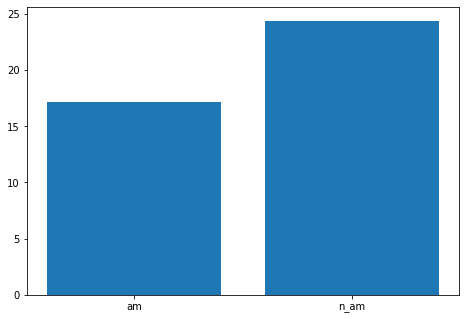

In [14]:
#ZADATAK 2.

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

mtcars = pd.read_csv('mtcars.csv')

#2.1
cyl_4=mtcars.query('cyl==4')['mpg'].mean()
cyl_6=mtcars.query('cyl==6')['mpg'].mean()
cyl_8=mtcars.query('cyl==8')['mpg'].mean()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['cyl_4','cyl_6','cyl_8']
y = [cyl_4,cyl_6,cyl_8]
ax.bar(x,y)


#2.2.
boxplot=mtcars.boxplot(column=['wt'],by='cyl')

#2.3.
am=mtcars.query('am==0')['mpg'].mean()
n_am=mtcars.query('am==1')['mpg'].mean()

fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
x1 = ['am','n_am']
y1 = [am,n_am]
ax1.bar(x1,y1)
#2.4.
cars=mtcars.groupby(by='am')
ax1=mtcars.plot.scatter(x='hp',y='qsec',c=mtcars['am'],cmap='tab20')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


21    2017-01-21
20    2017-01-20
29    2017-01-29
Name: vrijeme, dtype: object
    mjerenje     vrijeme  month  dayOfweek
274   40.791  2017-10-01     10          6
275   27.226  2017-10-02     10          0
276   15.117  2017-10-03     10          1
277   18.565  2017-10-04     10          2
278    6.765  2017-10-05     10          3
279    9.661  2017-10-06     10          4
280   11.474  2017-10-07     10          5
281   15.413  2017-10-08     10          6
282   19.635  2017-10-09     10          0
283   25.165  2017-10-10     10          1
284   39.013  2017-10-11     10          2
285   29.265  2017-10-12     10          3
286   20.974  2017-10-13     10          4
287   24.913  2017-10-14     10          5
288   38.578  2017-10-15     10          6
289   48.274  2017-10-16     10          0
290   71.257  2017-10-17     10          1
291   49.513  2017-10-18     10          2
292   40.122  2017-10-19     10          3
293   28.004  2017-10-20     10          4
294    25.57  201

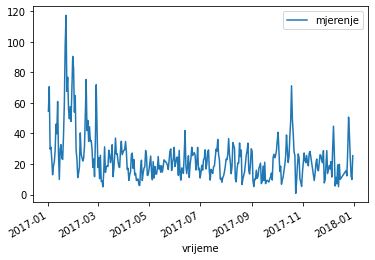

In [16]:
#ZADATAK 3
import urllib
import pandas as pd
import xml.etree.ElementTree as ET

url = 'http://iszz.azo.hr/iskzl/rs/podatak/export/xml?postaja=160&polutant=5&tipPodatka=4&vrijemeOd=01.01.2017&vrijemeDo=31.12.2017'

airQualityHR = urllib.request.urlopen(url).read()
root = ET.fromstring(airQualityHR)

df = pd.DataFrame(columns=('mjerenje', 'vrijeme'))

i = 0
while True:
    
    try:
        obj = root.getchildren()[i].getchildren()
    except:
        break
    
    row = dict(zip(['mjerenje', 'vrijeme'], [obj[0].text, obj[2].text]))
    row_s = pd.Series(row)
    row_s.name = i
    df = df.append(row_s)
    df.mjerenje[i] = float(df.mjerenje[i])
    i = i + 1

df.vrijeme = pd.to_datetime(df.vrijeme)
df.plot(y='mjerenje', x='vrijeme');

df['vrijeme'] = pd.to_datetime(df['vrijeme'],utc=True)
df['vrijeme'] = df['vrijeme'].dt.date                              
df['month'] = pd.DatetimeIndex(df['vrijeme']).month
df['dayOfweek'] = pd.DatetimeIndex(df['vrijeme']).dayofweek

print(df.sort_values(by=['mjerenje'], ascending=False).head(3).vrijeme)
print(df[df.month==10])
mv = pd.DataFrame(columns=('vrijeme', 'month'))
mv['vrijeme']=pd.date_range(start='2017-01-01',end='2017-12-31').difference(df.vrijeme)
mv['vrijeme'] = pd.to_datetime(mv['vrijeme'],utc=True)
mv['vrijeme'] = mv['vrijeme'].dt.date                              
mv['month'] = pd.DatetimeIndex(mv['vrijeme']).month
print(mv)    

